# **Project 1 Statistika dan Probabilitas**
## **Exploratory Data Analysis (EDA) pada Isu Cybersecurity**
* Mengenali struktur dan isi data
* Cleaning data
* Analisis deskriptif
* Visualisasi data (grafik, diagram, heatmap, dll.)
* Membuat insight dari data

In [ ]:
# 1. Mount Google Drive
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


##**Import data**
#### **Analisis Eksploratori Data Kebocoran Data (Data Breach) Global dari Tahun ke Tahun**
**Tujuan:**
1. Mengetahui **tahun** dengan jumlah kebocoran data terbanyak.  
2. Mengidentifikasi **domain/layanan** yang paling banyak mengalami insiden kebocoran data.  
3. Melihat **jumlah akun yang terdampak per kejadian** serta distribusinya.  
4. Memberikan gambaran umum mengenai **jenis data** (DataClasses) yang paling sering bocor.  
 <br>

**Tahapan:** Pemahaman struktur data, pembersihan, analisis deskriptif, visualisasi, dan insight

*Dataset diambil dari:* <br>
*https://www.kaggle.com/datasets/gojoyuno/cyber-breach-analysis-dataset/data?select=breached_services_info.csv*

In [ ]:
# import requirements library
# mengolah dataset
import pandas as pd

# fungsi matematis
import numpy as np

# membuat graph
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load dataset
df = pd.read_csv("/content/drive/MyDrive/SEMESTER 1/Statistika & Probabilitas ( StatProb ) /breached_services_info.csv", index_col=0)

##**Deskripsi Data**
<p align="justify"> Kumpulan data ini memberikan gambaran komprehensif tentang insiden keamanan siber dan akun yang disusupi dari berbagai sumber di seluruh dunia. Kumpulan data ini mencakup informasi tentang pelanggaran data, insiden keamanan, dan akun yang disusupi di berbagai industri dan platform. Kumpulan data ini mencakup berbagai ancaman siber, termasuk serangan phishing, infeksi malware, kebocoran data, dan lainnya. Para peneliti, analis, dan profesional keamanan siber dapat menggunakan kumpulan data ini untuk mempelajari tren dan mengidentifikasi kerentanan umum. Dengan informasi detail tentang tanggal, jenis, dan tingkat keparahan setiap insiden, kumpulan data ini menawarkan wawasan berharga tentang perkembangan lanskap ancaman keamanan siber dalam skala global.

In [ ]:
# Melihat 5 baris pertama
print(df.head())

         Name       Title          Domain  BreachDate             AddedDate  \
0  000webhost  000webhost  000webhost.com  2015-03-01  2015-10-26T23:35:45Z   
1       123RF       123RF       123rf.com  2020-03-22  2020-11-15T00:59:50Z   
2         126         126         126.com  2012-01-01  2016-10-08T07:46:05Z   
3     17Media          17        17app.co  2016-04-19  2016-07-08T01:55:03Z   
4       17173       17173       17173.com  2011-12-28  2018-04-28T04:53:15Z   

           ModifiedDate  PwnCount  \
0  2017-12-10T21:44:27Z  14936670   
1  2020-11-15T01:07:10Z   8661578   
2  2016-10-08T07:46:05Z   6414191   
3  2016-07-08T01:55:03Z   4009640   
4  2018-04-28T04:53:15Z   7485802   

                                         Description  \
0  In approximately March 2015, the free web host...   
1  In March 2020, the stock photo site <a href="h...   
2  In approximately 2012, it's alleged that the C...   
3  In April 2016, customer data obtained from the...   
4  In late 2011, <a hr

In [ ]:
# Informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                777 non-null    object
 1   Title               777 non-null    object
 2   Domain              739 non-null    object
 3   BreachDate          777 non-null    object
 4   AddedDate           777 non-null    object
 5   ModifiedDate        777 non-null    object
 6   PwnCount            777 non-null    int64 
 7   Description         777 non-null    object
 8   LogoPath            777 non-null    object
 9   DataClasses         777 non-null    object
 10  IsVerified          777 non-null    bool  
 11  IsFabricated        777 non-null    bool  
 12  IsSensitive         777 non-null    bool  
 13  IsRetired           777 non-null    bool  
 14  IsSpamList          777 non-null    bool  
 15  IsMalware           777 non-null    bool  
 16  IsSubscriptionFree  777 non-nul

In [ ]:
# Statistik deskriptif numerik & kategorikal
print("\nStatistik numerik:")
display(df.describe())
print("\nStatistik kategorikal:")
display(df.describe(include=[object]))


Statistik numerik:


,BreachDate,PwnCount,Year,PwnCount_log
count,777,7.770000e+02,777.000000,777.000000
mean,2018-04-13 06:38:27.335907328,1.739676e+07,2017.808237,14.055803
min,2007-07-12 00:00:00,8.580000e+02,2007.000000,6.755769
25%,2015-12-01 00:00:00,2.695520e+05,2015.000000,12.504520
50%,2018-07-01 00:00:00,1.141278e+06,2018.000000,13.947660
75%,2020-10-14 00:00:00,5.970416e+06,2020.000000,15.602327
max,2024-05-30 00:00:00,7.729050e+08,2024.000000,20.465667
std,NaN,7.006886e+07,3.331439,2.359927



Statistik kategorikal:


,Name,Title,Domain,AddedDate,ModifiedDate,Description,LogoPath,DataClasses
count,777,777,739,777,777,777,777,777
unique,777,777,720,773,768,777,717,401
top,DecoratingTheHouse,집꾸미기,ogusers.com,2013-12-04T00:00:00Z,2022-01-05T04:11:30Z,"In March 2020, the Korean interior decoration ...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords..."
freq,1,1,4,5,4,1,32,94


In [ ]:
# Memeriksa jumlah missing values per kolom
print(df.isnull().sum())

Name                   0
Title                  0
Domain                38
BreachDate             0
AddedDate              0
ModifiedDate           0
PwnCount               0
Description            0
LogoPath               0
DataClasses            0
IsVerified             0
IsFabricated           0
IsSensitive            0
IsRetired              0
IsSpamList             0
IsMalware              0
IsSubscriptionFree     0
Year                   0
PwnCount_log           0
dtype: int64


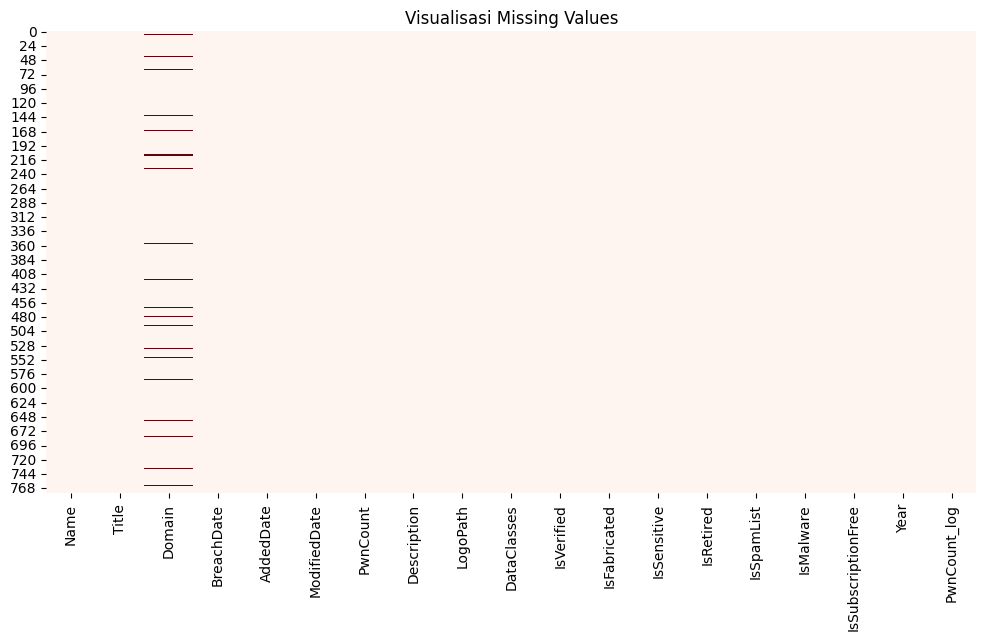

In [ ]:
# Heatmap missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Visualisasi Missing Values")
plt.show()

In [ ]:
# Cek semua nama kolom
print(df.columns.tolist())


['Name', 'Title', 'Domain', 'BreachDate', 'AddedDate', 'ModifiedDate', 'PwnCount', 'Description', 'LogoPath', 'DataClasses', 'IsVerified', 'IsFabricated', 'IsSensitive', 'IsRetired', 'IsSpamList', 'IsMalware', 'IsSubscriptionFree', 'Year', 'PwnCount_log']


1.	Name: The name of the breached entity.
2.	Title: A brief title or label for the breach.D
3.	Domain: The domain name associated with the breach (if available).
4.	BreachDate: The date when the breach occurred
5.	AddedDate: The date when the breach was added to the database.
6.	ModifiedDat: The date when the breach data was last modified.
7.	PwnCount The number of accounts impacted by the breach.
8.	Description: A description of the breach.
9.	IsVerified A boolean indicating whether the data breach has been verified.
10.	IsFabricated A boolean indicating whether the data has been fabricated.
11.	IsSensitive: A boolean indicating whether the data is sensitive.
12.	IsRetired : A boolean indicating whether the data is retired.
13.	IsSpamList A boolean indicating whether the data is part of a spam list.
14.	IsMalware : A boolean indicating whether the data includes malware.
15.	IsSubscriptionFree: A boolean indicating whether the service is subscription-free

In [ ]:
# Cek jumlah baris duplikat (baris yang seluruh kolomnya identik)
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat ditemukan: {jumlah_duplikat}")

# Tampilkan baris duplikat (opsional, untuk dilihat sebelum dihapus)
if jumlah_duplikat > 0:
    display(df[df.duplicated()].head())

# Hapus baris duplikat
df.drop_duplicates(inplace=True)

# Konfirmasi jumlah baris setelah duplikasi dihapus
print(f"Jumlah baris setelah menghapus duplikat: {df.shape[0]}")

Jumlah baris duplikat ditemukan: 0
Jumlah baris setelah menghapus duplikat: 777


In [ ]:
# Identifikasi outlier pwn count
# Hitung kuartil
Q1 = df['PwnCount'].quantile(0.25)
Q3 = df['PwnCount'].quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identifikasi outlier
outliers = df[(df['PwnCount'] < lower_bound) | (df['PwnCount'] > upper_bound)]

print(f"Jumlah outlier terdeteksi: {outliers.shape[0]}")

# Tampilkan beberapa outlier teratas
outliers[['Name', 'BreachDate', 'PwnCount']].sort_values(by='PwnCount', ascending=False).head(10)

Lower Bound: -8281744.0
Upper Bound: 14521712.0
Jumlah outlier terdeteksi: 129


,Name,BreachDate,PwnCount
141,Collection1,2019-01-07,772904991
708,VerificationsIO,2019-02-25,763117241
490,OnlinerSpambot,2017-08-28,711477622
165,PDL,2019-10-16,622161052
230,ExploitIn,2016-10-13,593427119
235,Facebook,2019-08-01,509458528
41,AntiPublic,2016-12-16,457962538
575,RiverCityMedia,2017-01-01,393430309
654,TelegramCombolists,2024-05-28,361468099
459,MySpace,2008-07-01,359420698


In [ ]:
# Buang outlier: PwnCount lebih besar dari upper bound
df_clean = df[df['PwnCount'] <= 14521712].copy()

print(f"Jumlah data asli: {df.shape[0]} baris")
print(f"Jumlah data setelah buang outlier: {df_clean.shape[0]} baris")
print(f"Jumlah baris terbuang (outlier): {df.shape[0] - df_clean.shape[0]} baris")


Jumlah data asli: 777 baris
Jumlah data setelah buang outlier: 648 baris
Jumlah baris terbuang (outlier): 129 baris


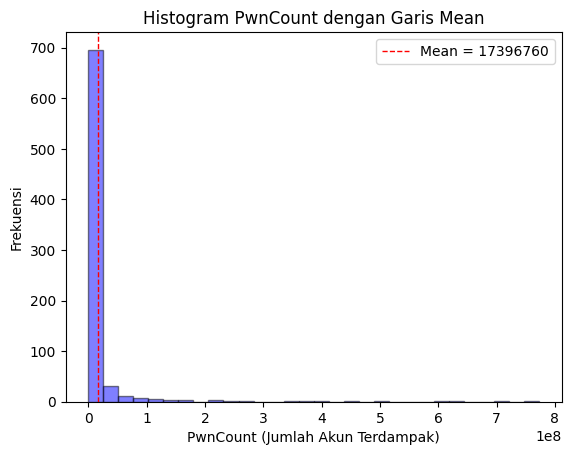

In [ ]:
# Gunakan data asli PwnCount (bisa juga data tanpa outlier jika sudah dibersihkan)
plt.hist(df['PwnCount'], bins=30, edgecolor='black', alpha=0.5, color='blue')

# Hitung mean kolom PwnCount
mean_value = df['PwnCount'].mean()

# Tambahkan garis vertikal mean
plt.axvline(x=mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_value:.0f}')

# Label dan judul
plt.xlabel('PwnCount (Jumlah Akun Terdampak)')
plt.ylabel('Frekuensi')
plt.title('Histogram PwnCount dengan Garis Mean')

# Legend
plt.legend()

# Tampilkan plot
plt.show()


(648, 19)
count    777.000000
mean      14.055803
std        2.359927
min        6.755769
25%       12.504520
50%       13.947660
75%       15.602327
max       20.465667
Name: PwnCount_log, dtype: float64


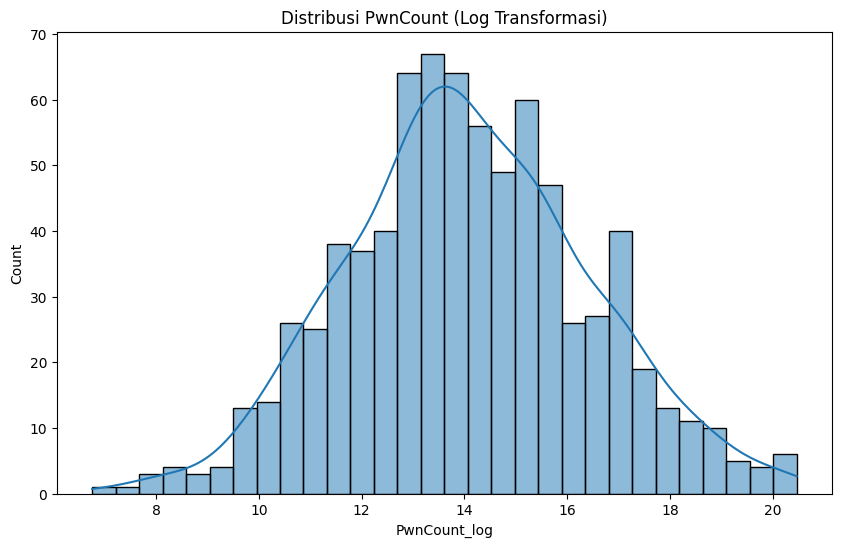

In [ ]:
# Hitung IQR
Q1 = df["PwnCount"].quantile(0.25)
Q3 = df["PwnCount"].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data tanpa outlier
df_filtered = df[(df["PwnCount"] >= lower_bound) & (df["PwnCount"] <= upper_bound)]

# Cek ukuran data setelah penghapusan outlier
print(df_filtered.shape)

# Tambahkan kolom PwnCount yang sudah ditransformasi log
df['PwnCount_log'] = df['PwnCount'].apply(lambda x: np.log(x + 1))  # +1 untuk menghindari log(0)

# Cek statistik setelah transformasi
print(df['PwnCount_log'].describe())

# Visualisasi histogram untuk data yang sudah ditransformasi
plt.figure(figsize=(10,6))
sns.histplot(df['PwnCount_log'], kde=True, bins=30)
plt.title("Distribusi PwnCount (Log Transformasi)")
plt.show()


BreachYear
2007     1
2008     2
2009     2
2010     4
2011     9
2012     8
2013    20
2014    42
2015    65
2016    79
2017    39
2018    48
2019    50
2020    70
2021    53
2022    42
2023    32
2024    15
Name: count, dtype: int64


/tmp/ipython-input-4021470483.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=breach_per_year.index, y=breach_per_year.values, palette='mako')


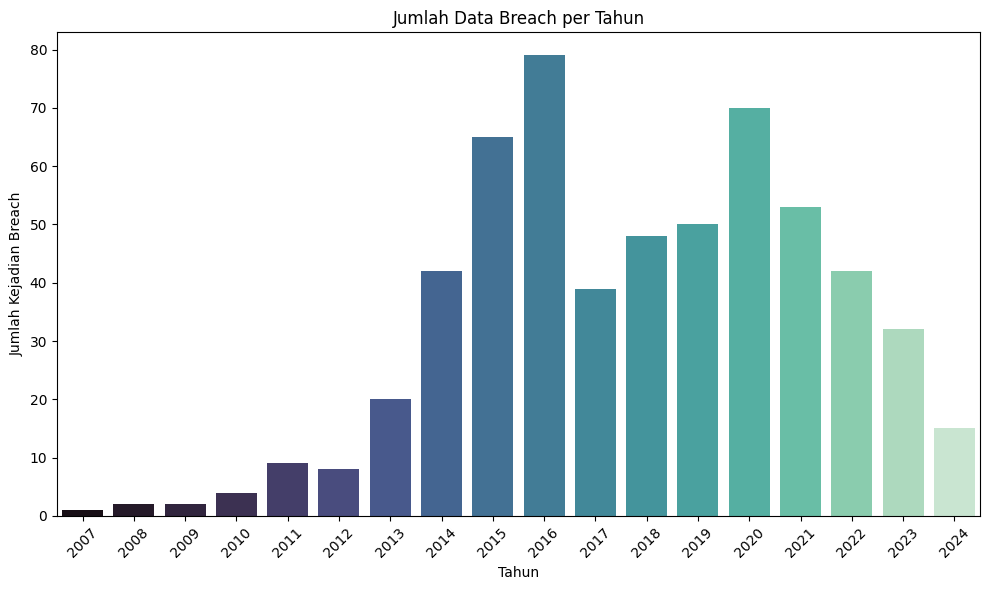

In [ ]:
# Ubah kolom BreachDate ke format datetime
df_clean_final['BreachDate'] = pd.to_datetime(df_clean_final['BreachDate'], errors='coerce')

# Buat kolom baru 'BreachYear'
df_clean_final['BreachYear'] = df_clean_final['BreachDate'].dt.year

# Jumlah breach per tahun
breach_per_year = df_clean_final['BreachYear'].value_counts().sort_index()

# Tampilkan
print(breach_per_year)
plt.figure(figsize=(10,6))
sns.barplot(x=breach_per_year.index, y=breach_per_year.values, palette='mako')
plt.title('Jumlah Data Breach per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejadian Breach')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

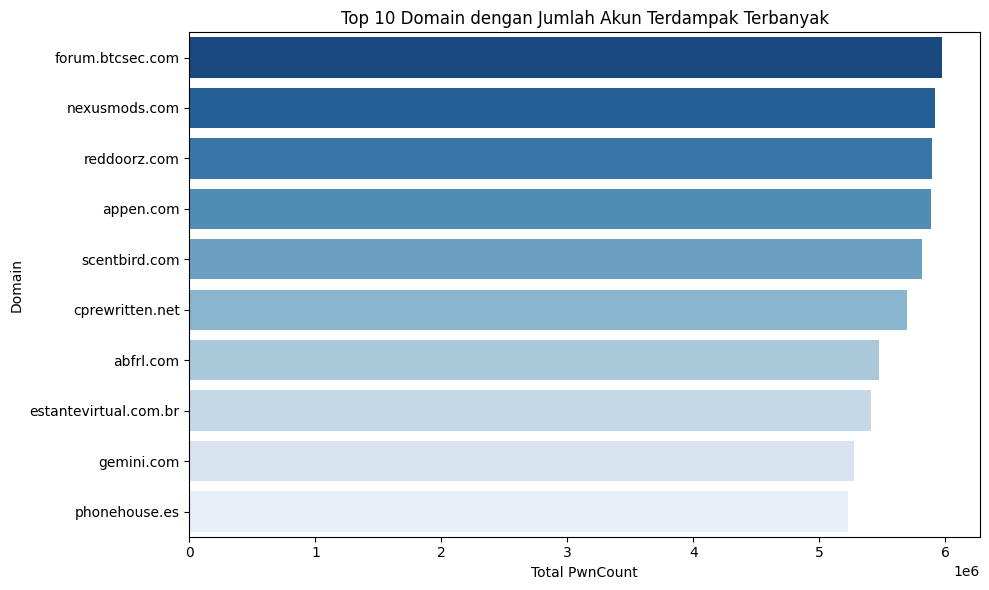

In [ ]:
# Kelompokkan berdasarkan domain dan jumlahkan PwnCount
domain_pwn = df_clean_final.groupby('Domain')['PwnCount'].sum().sort_values(ascending=False)

# Tampilkan 10 domain teratas
domain_pwn.head(10)

# Ambil 10 domain teratas
top_domains = domain_pwn.head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_domains.values,
    y=top_domains.index,
    hue=top_domains.index,  # pakai domain sebagai hue (meski hanya untuk warna unik)
    palette='Blues_r',
    dodge=False,
    legend=False
)
plt.title('Top 10 Domain dengan Jumlah Akun Terdampak Terbanyak')
plt.xlabel('Total PwnCount')
plt.ylabel('Domain')
plt.tight_layout()
plt.show()

Dari analisis 20 domain dengan jumlah akun terdampak terbanyak, seluruh domain pada 5 besar adalah domain .com.

Ini menunjukkan bahwa domain komersial (biasanya milik perusahaan besar) adalah target utama dari serangan siber, kemungkinan karena:
- Basis pengguna yang sangat besar
- Potensi nilai data yang tinggi (email, password, data pribadi)
- Fokus industri pada monetisasi, bukan keamanan

Hal ini memperkuat bahwa entitas bisnis berbasis .com memiliki risiko tinggi dan perlu memperkuat sistem keamanan siber mereka.

In [ ]:
from collections import Counter
import ast

# Himpun semua data classes dari semua breach
all_classes = []

for item in df_clean_final['DataClasses'].dropna():
    try:
        # Parsing jika string list (contoh: "['Email', 'Passwords']")
        if isinstance(item, str):
            parsed = ast.literal_eval(item)
            all_classes.extend(parsed)
        elif isinstance(item, list):
            all_classes.extend(item)
    except:
        continue  # skip jika gagal parse

# Hitung frekuensi tiap data class
data_class_counts = Counter(all_classes)

# Konversi ke DataFrame
import pandas as pd
data_class_df = pd.DataFrame(data_class_counts.items(), columns=['DataClass', 'Frequency'])
data_class_df = data_class_df.sort_values(by='Frequency', ascending=False)

# Tampilkan 10 data class paling sering bocor
data_class_df.head(10)


,DataClass,Frequency
1,Email addresses,576
3,Passwords,452
4,Usernames,319
2,IP addresses,273
8,Names,267
9,Phone numbers,181
5,Dates of birth,167
13,Physical addresses,143
10,Genders,103
6,Geographic locations,70


Berdasarkan analisis 581 data breach (setelah outlier dibersihkan), didapatkan bahwa:
- Email addresses adalah jenis data yang paling sering bocor, muncul dalam 576 breach, menunjukkan bahwa hampir semua sistem layanan daring menyimpan email pengguna.
- Passwords muncul dalam 452 breach — ini sangat berbahaya karena membuka akses langsung ke akun pengguna.
- Usernames, IP addresses, dan Names juga sering terdampak, menunjukkan bahwa data identitas dasar juga rawan bocor.
- Data yang lebih sensitif seperti Phone numbers, Dates of birth, dan Physical addresses juga muncul dalam ratusan breach.
- Meskipun lebih jarang, data seperti Gender dan Geographic locations tetap signifikan karena bisa digunakan untuk profiling pengguna.

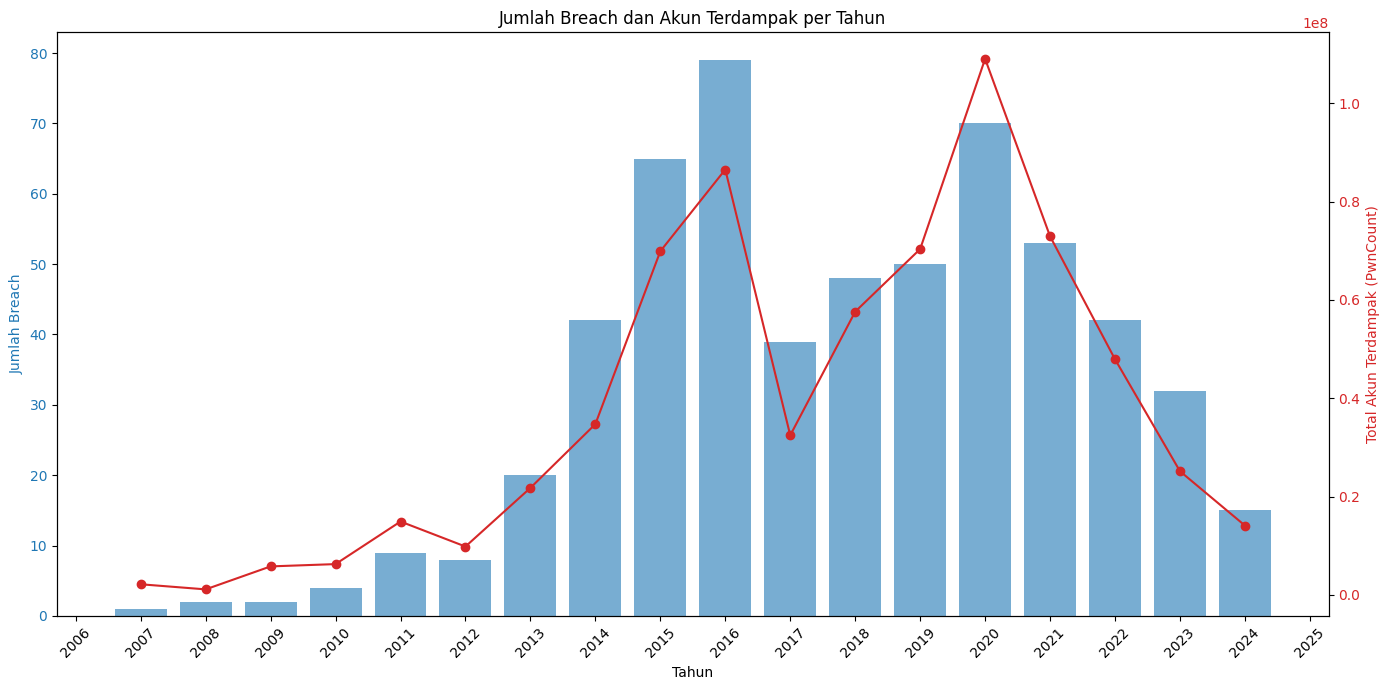

In [ ]:
import matplotlib.ticker as ticker

# Pastikan BreachYear tipe int
df_clean_final['BreachYear'] = df_clean_final['BreachYear'].astype(int)

# Hitung jumlah breach per tahun
breach_per_year = df_clean_final['BreachYear'].value_counts().sort_index()

# Hitung total akun terdampak (PwnCount) per tahun
pwncount_per_year = df_clean_final.groupby('BreachYear')['PwnCount'].sum().sort_index()

# Buat index tahun lengkap dari min ke max tahun (lengkapi missing year dengan 0)
all_years = range(df_clean_final['BreachYear'].min(), df_clean_final['BreachYear'].max() + 1)

breach_per_year = breach_per_year.reindex(all_years, fill_value=0)
pwncount_per_year = pwncount_per_year.reindex(all_years, fill_value=0)

# Plot
fig, ax1 = plt.subplots(figsize=(14,7))

color = 'tab:blue'
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Jumlah Breach', color=color)
bars = ax1.bar(breach_per_year.index, breach_per_year.values, color=color, alpha=0.6, label='Jumlah Breach')
ax1.tick_params(axis='y', labelcolor=color)

# Atur sumbu x dengan integer tahun dan rotasi label agar jelas
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=45)

# Buat twin axis untuk PwnCount
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Akun Terdampak (PwnCount)', color=color)
line = ax2.plot(pwncount_per_year.index, pwncount_per_year.values, color=color, marker='o', label='PwnCount')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Jumlah Breach dan Akun Terdampak per Tahun')
fig.tight_layout()
plt.show()


Dari total 581 data breach yang dianalisis, rata-rata jumlah akun yang terdampak (mean) adalah sekitar 1.174.836 akun. Namun, nilai median sebesar 580.177 akun menunjukkan bahwa setengah dari breach memengaruhi kurang dari jumlah tersebut, yang mengindikasikan distribusi data sedikit miring ke kanan (beberapa breach sangat besar memengaruhi banyak akun).

Nilai modus sebesar 858 akun mengindikasikan jumlah akun yang paling sering muncul dalam dataset ini adalah breach kecil yang berdampak pada sekitar 858 akun.

Variasi jumlah akun terdampak cukup besar, dengan standar deviasi sekitar 1.410.295 akun, yang menunjukkan adanya perbedaan signifikan antara breach kecil dan besar.

Nilai minimum adalah 858 akun, dan nilai maksimum setelah pembersihan outlier adalah 5.915.013 akun, yang memperlihatkan rentang dampak breach dari yang relatif kecil hingga sangat besar.

Kuartil pertama (Q1) sebesar 150.129 akun dan kuartil ketiga (Q3) sebesar 1.531.235 akun menunjukkan bahwa 50% breach berdampak pada jumlah akun di kisaran tersebut.

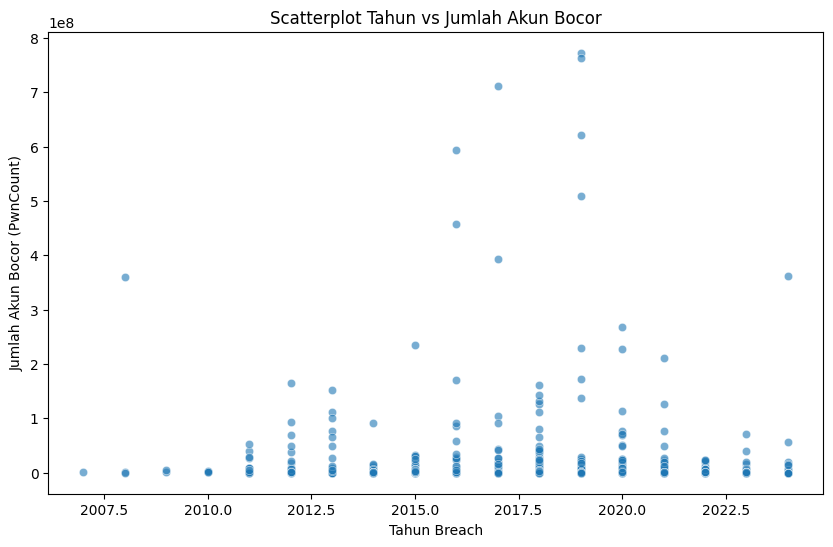

In [ ]:
# Ubah BreachDate ke datetime
df["BreachDate"] = pd.to_datetime(df["BreachDate"], errors="coerce")

# Buat kolom tahun
df["Year"] = df["BreachDate"].dt.year

# Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x="Year", y="PwnCount", data=df, alpha=0.6)
plt.xlabel("Tahun Breach")
plt.ylabel("Jumlah Akun Bocor (PwnCount)")
plt.title("Scatterplot Tahun vs Jumlah Akun Bocor")
plt.show()

##**Insight**
1. Jumlah breach naik drastis pada tahun 2013 - 2016, puncaknya pada tahun 2016 di mana ± 80 breach.
2. Total akun terdampak paling tinggi di tahun 2020, di mana lebih dari 100 juta akun terdampak.
3. Baik jumlah breach maupun akun terdampak menurun drastis sejak 2021.

##**Potensi Masalah**
1. Outlier ekstrem pada PwnCount yang dapat mengganggu analisis rata-rata.
2. Imbalance data pada variabel boolean
3. Terdapat missing value dibeberapa kolom

##**Kesimpulan**
1. Tahun dengan kebocoran terbanyak
- Dari 2015-2024, tahun 2016 punya jumlah kasus terbanyak.
- Disusul tahun 2020.
2. Layanan/Database dengan jumlah data bocor terbesar (Top 5)
- forum.btcsec.com
- nexusmods.com
- reddoorz.com
- appen.com
- scentbird.com
3. Jumlah data yang bocor per kejadian (PwnCount)
- Minimum: 858 akun
- Median: 1,14 juta akun
- Rata-rata: 17,3 juta akun
- Maksimum: 772 juta akun
4. Jenis data yang paling sering bocor adalah **Email addresses, Passwords, Usernames.** Hal ini mengindikasikan bahwa **informasi identitas dasar** seperti email dan password tetap menjadi target utama dalam banyak insiden.
